# Riemann Sums and Definite Integrals

**OBJECTIVE**

- Approximate area under a curve using Riemann Sums
- Investigate patterns as we move to infinite rectangles
- Define the *Definite Integral* formally and informally
- Use `python` to determine the definite integral


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Riemann Sum

Starting where we left off with an approximation of the area under a function, on a closed interval we aim to determine a general formula for the area under a curve based on the following inputs:

- A function $f$
- A domain $[a, b]$. 
- A number of approximating rectangles $n$

We use these to determine the area as a sum of areas of rectangles with some width and height. 

$$\text{Area} \approx \sum_{i = 1}^n \text{widths} \times \text{heights}$$

we make life easier by making the rectangles all equal width and are left with the idea:

$$\text{Area} \approx \text{width} \times \sum_{i = 1}^n \text{heights}$$

### Example 1: Left-Handed Sums

Let's be concrete with a small example.  Here, let our function be $f(x) = -x^2 + 1$ on $[-1, 1]$ and let $n = 4$.  

------
- What is the width of each rectangle?
- List the left endpoints of each subinterval.
- Write a formula for these
- Use algorithm to determine
- Express the sum of the rectangles heights as: $f(x_0) + f(x_1) + f(x_2) + f(x_3)$, and replace $x_0, x_1, x_2, x_3$ with the values from above.  
- Evaluate the area.
-----

In [2]:
#width of one rectangle?


In [3]:
#left endpoints


In [4]:
#width times height


In [5]:
#area


## Riemann Sum: A Definition

*In mathematics, a Riemann sum is a certain kind of approximation of an integral by a finite sum. It is named after nineteenth century German mathematician Bernhard Riemann. One very common application is approximating the area of functions or lines on a graph, but also the length of curves and other approximations.* -- [Source](https://en.wikipedia.org/wiki/Riemann_sum)

-----
A Riemann sum $S$ of $f$ over $I$ with partition $P$ is defined as:

$$\displaystyle S=\sum _{i=1}^{n}f(x_{i}^{*})\,\Delta x_{i}$$


where 

$\displaystyle \Delta x_{i}=x_{i}-x_{i-1}$ and $x_{i}^{*} \in [x_{i-1},x_{i}]$

-----

**PROBLEM**

- Find an approximation for the area under the curve $f(x) = x^3$ on $[1, 3]$ with $n = 5$. 

Consider the function $f(x) = 4 - x^2$ on the interval $[-2,2]$.  

- Draw a plot of the function
- Use the above formula for $L(4)$ to find an approximation for the area under the curve.

### General Example

Find an expression for the area under the curve $$f(x) = x^3 - x$$ on $[1, 4]$ with $n$ rectangles.  

**Recall**: 

$$\sum_{i = 1}^n i = \frac{n^2 + n}{2} \quad \sum_{i = 1}^n i^3 = \big[\frac{n^2 + n}{2}\big]^2$$

In [6]:
from IPython.display import IFrame

In [7]:
IFrame(src = '', width = 100, height = 200)

**Problems**

1. Riemann sum for $f(x) = x^3$ on $[2, 4]$

2. Riemann sum for $f(x) = 3x^3 - 2x$ on $[1, 3]$




### Taking it to the limit

What happens if we increase the number of rectangles?

In [8]:
x = np.linspace(-2,2,100)
def f(x): return x**2
def riemann_slider(n):
    a = x[0] #left endpoint
    b = x[-1] #right endpoint
    width = (b-a)/n #width of rectangles
    plt.plot(x, f(x), color = 'black') #plot the function
    bases = np.array([a + width*i for i in range(n)]) #determine base points
    plt.bar(bases, f(bases), width = width, align = 'edge', 
           color = 'orange', edgecolor = 'black') #plot the rectangles
    areas = [width * height for height in f(bases)] #find the area
    print(sum(areas))

In [9]:
from ipywidgets import interact
import ipywidgets as widgets

In [10]:
interact(riemann_slider,  n = widgets.IntSlider(1, min = 1, max = 100, step = 2));

interactive(children=(IntSlider(value=1, description='n', min=1, step=2), Output()), _dom_classes=('widget-int…

### The Definite Integral

<center>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Integral_example.svg/600px-Integral_example.svg.png' width = 50%/>
</center>

In mathematics, an integral assigns numbers to functions in a way that describes displacement, area, volume, and other concepts that arise by combining infinitesimal data. The process of finding integrals is called integration. Along with differentiation, integration is a fundamental operation of calculus, and serves as a tool to solve problems in mathematics and physics involving the area of an arbitrary shape, the length of a curve, and the volume of a solid, among others.

$$\int_a^b f(x) dx$$

**Examples**

- $\int_0^2 x^2 dx$
- $\int_{-\pi}^{\pi} \sin{x}dx$

In [11]:
from scipy.integrate import quad

In [12]:
#define the function


In [13]:
#determine domain


In [14]:
#plot it


In [15]:
#find area


In [16]:
#define the function


In [17]:
#determine the domain


In [18]:
#plot it


In [19]:
#find the area


### Application I: The Normal Distribution

Recall that we have a standard normal distribution defined as:

$$f(x) = \frac{1}{\sqrt{2\pi}}e^\frac{-x^2}{2}$$

In [20]:
def f(x): 
    return 1/np.sqrt(2*np.pi) * np.exp((-x**2)/2)

In [21]:
x = np.linspace(-3, 3, 1000)

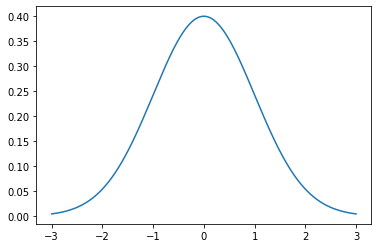

In [22]:
plt.plot(x, f(x))

### Application II: Net Change Theorem

The net change theorem considers the integral of a rate of change. It says that when a quantity changes, the new value equals the initial value plus the integral of the rate of change of that quantity. The formula can be expressed in two ways. The second is more familiar; it is simply the definite integral.

**EXAMPLE**: Suppose a car is moving due north (the positive direction) at 40 mph between 2 p.m. and 4 p.m., then the car moves south at 30 mph between 4 p.m. and 5 p.m.

**PROBLEMS**

1. Given a velocity function $v(t) = 3t - 5$ (in meters per second) for a particle in motion from time $t = 0$ to time $t = 3$, find the net displacement of the particle.

2. Find the net displacement and total distance traveled in meters given the velocity function $f(t) = .5e^t - 2$ over the interval $[0,2]$.





### Application III: Area Between Curves

Consider the curves $f(x) = \sqrt{x}$ and $g(x) = x^2$.

In [23]:
#define the functions


In [24]:
#plot them together


In [25]:
#examine area


**Problem**

1. Area between $y = x^2$ and $y = x^3$
2. $y = e^x$ and $y = e^{2x - 1}$
3. $y = \cos{x}$ and $y = \cos^2{x}$ on $[-\pi, \pi]$
